# Objective : Salary Predection
# EDA - Python
# Insights - Patterns
# Regression

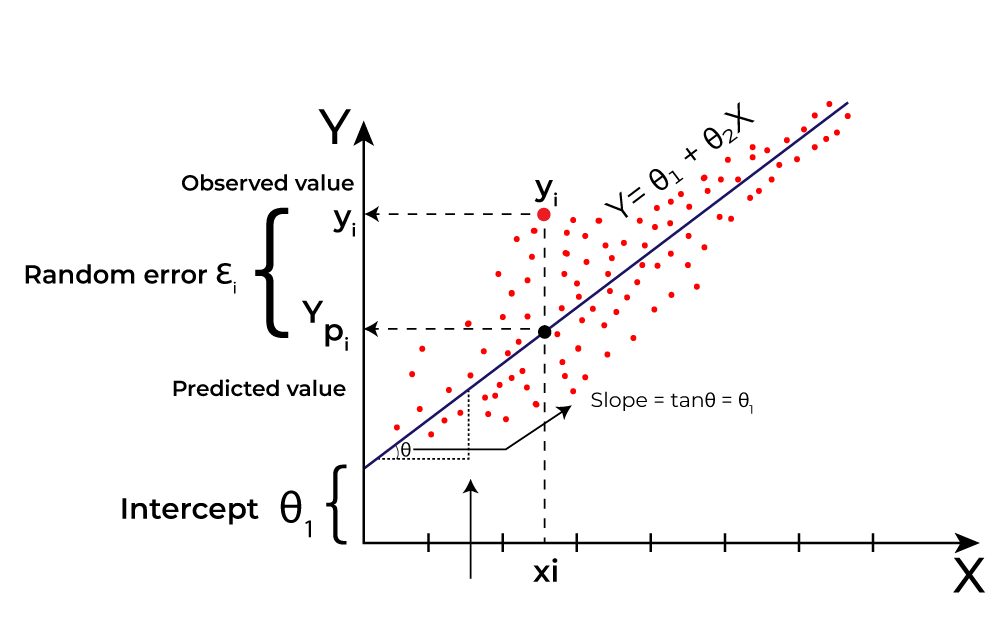

# 1. Import Python Modules

In [1]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

# 2.  Load Cars Price Dataset

In [2]:
file_path = r"Salary_Data-Salary_Data.csv"
salary_df = pd.read_csv(file_path)
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# 3. Basic Inspection on dataset

In [3]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(salary_df)

top 5 rows - using head
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

bottom 5 rows using tail
    YearsExperience  Salary
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872

numbers of samples and columns
(30, 2)

numbers of samples 
30

numbers of entries in the data frame
60

Columns Names
Index(['YearsExperience', 'Salary'], dtype='object')

Columns dtypes
YearsExperience    float64
Salary               int64
dtype: object

Dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None



$ Observations $
1. Total observation in the dataset is 30
2. Dataset has input columns - YearsExperience as Numberical 
3. Target column is Salary as Numerical - It is regression

# 4. Handling Missing Values - Cat

In [4]:
# There is no missing values in cat columns

# 5. Categorical- Variable - Analysis -Using Pipeline

In [5]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

In [6]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(salary_df)

# 6. Handling Missing Values in Numerical Columns

In [7]:
# There is no missing values in num columns

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [8]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


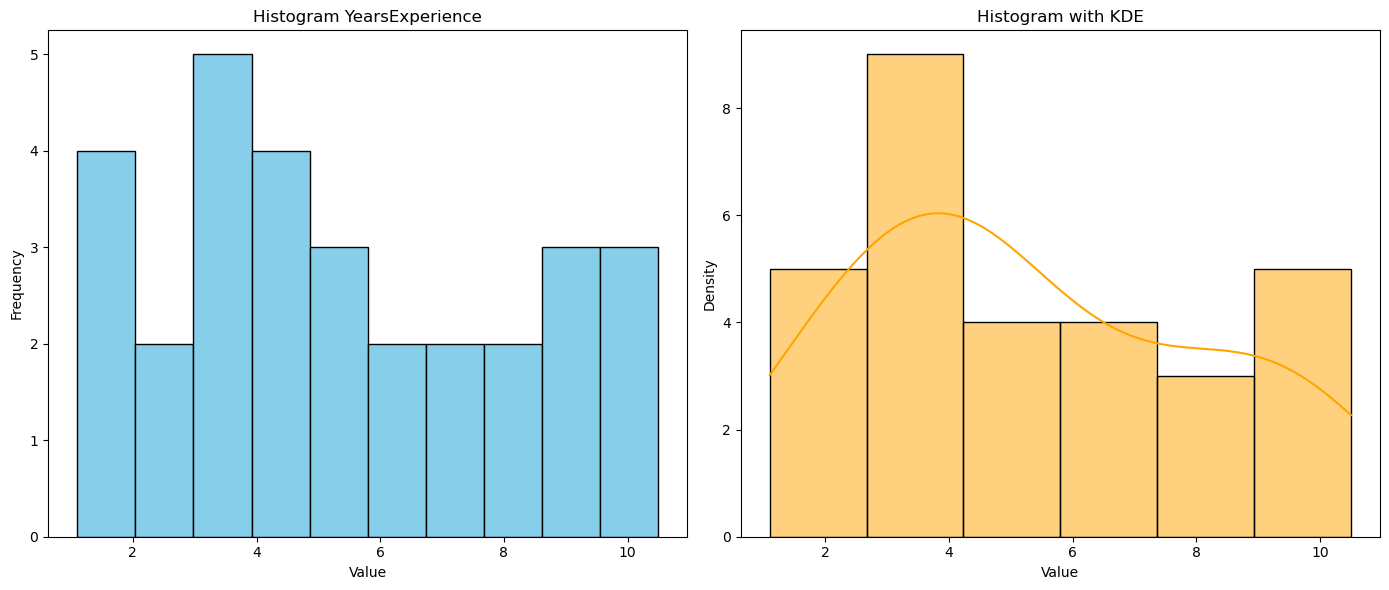

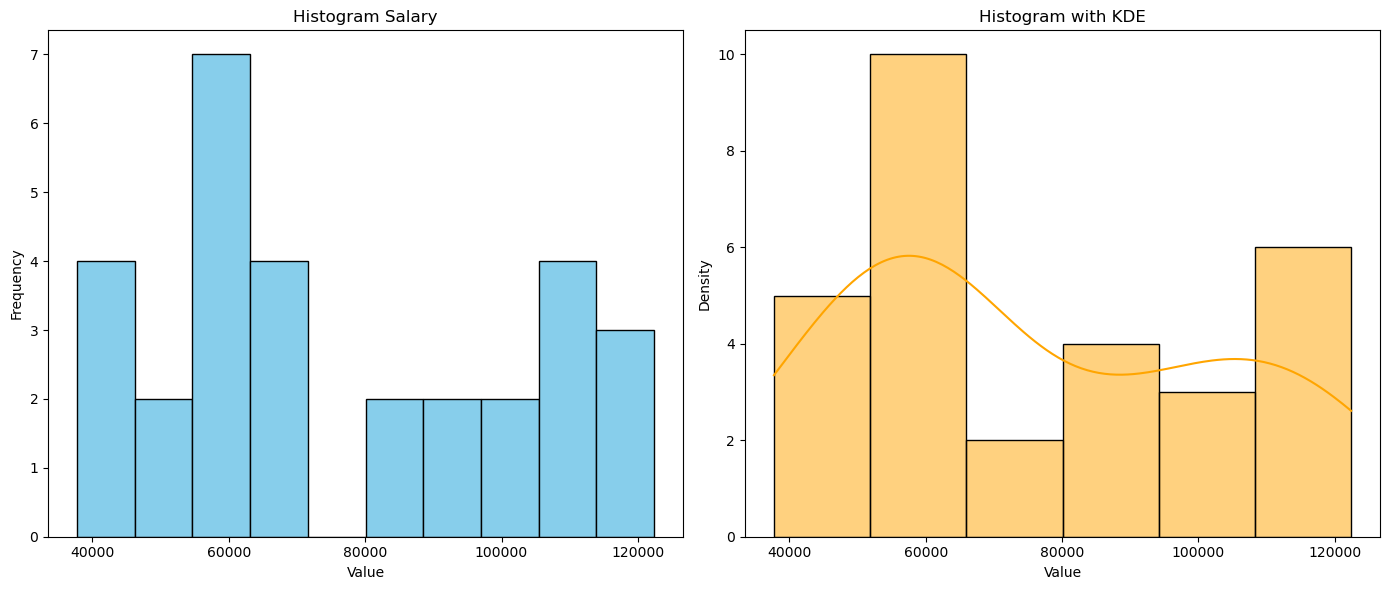

In [9]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(salary_df)

 # 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## Num Vs Num

In [10]:
print(salary_df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


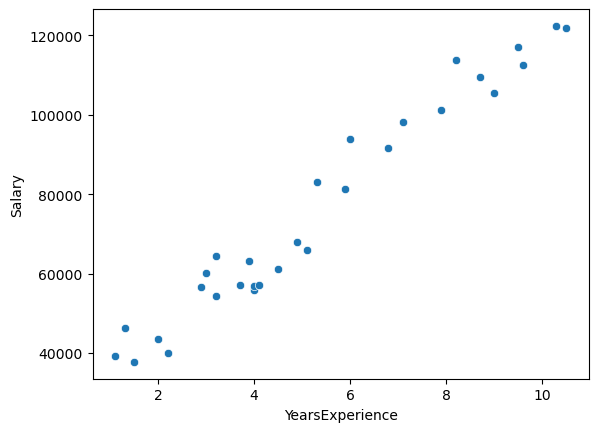

In [11]:
sns.scatterplot(data=salary_df,y='Salary',x='YearsExperience')
plt.show()

$Observations$
1. There is relationship b/w varaibles (Exp vs Salary)

In [12]:
salary_df[['YearsExperience', 'Salary']].corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


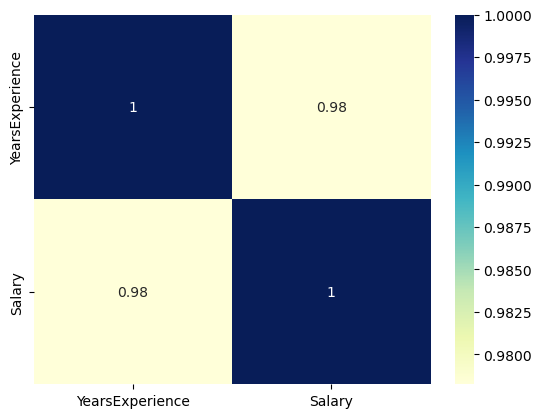

In [13]:
sns.heatmap(salary_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

In [14]:
salary_df["YearsExperience_log"]=np.log1p(salary_df["YearsExperience"])
salary_df["Salary_log"]=np.log(salary_df["Salary"])

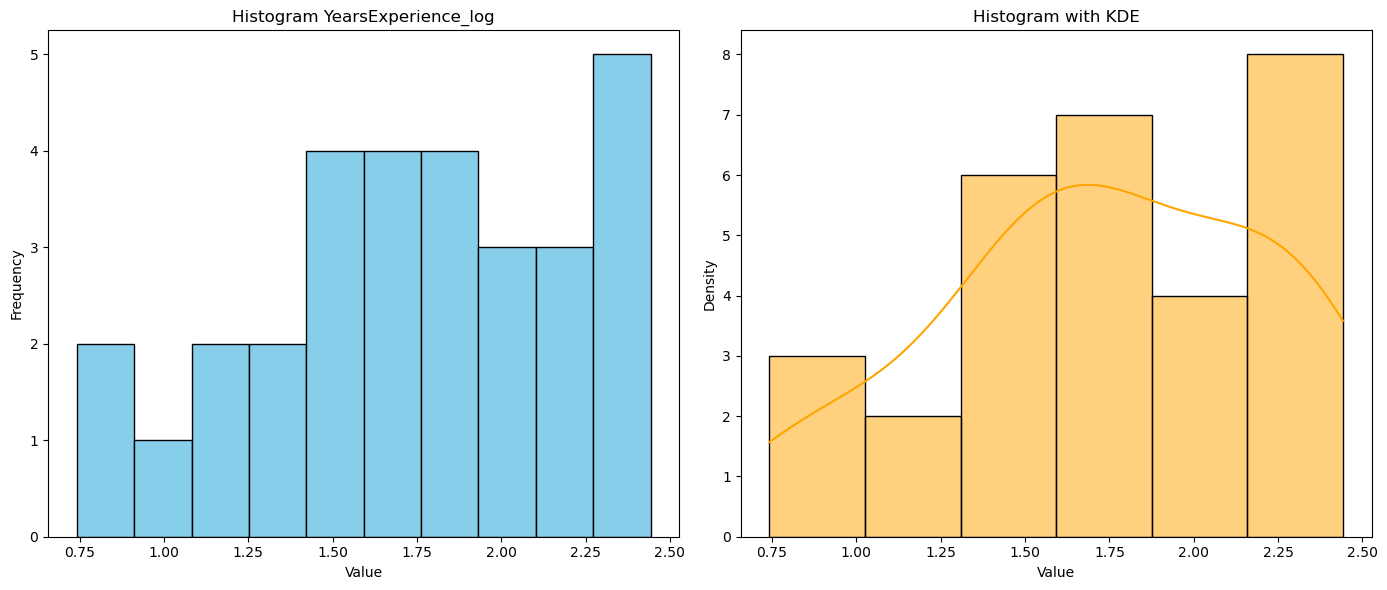

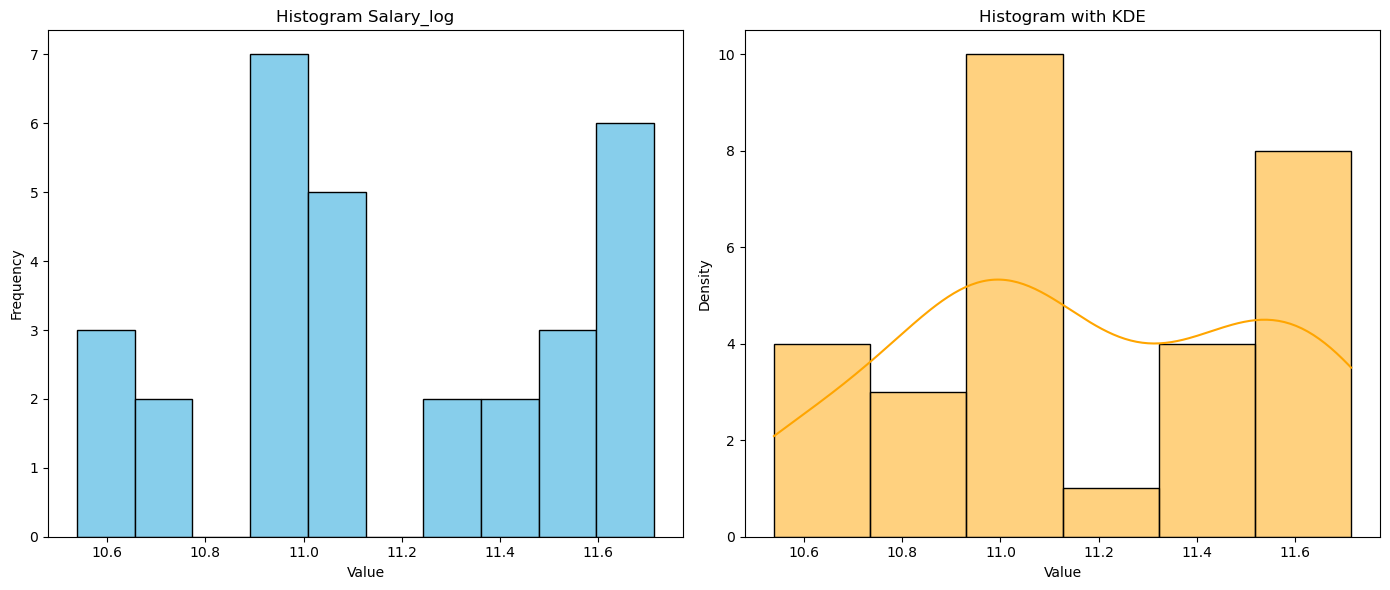

In [15]:
salary_num_df = salary_df[['YearsExperience_log', 'Salary_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(salary_num_df)

In [16]:
salary_df["YearsExperience_sqrt"]=np.sqrt(salary_df["YearsExperience"])
salary_df["Salary_sqrt"]=np.sqrt(salary_df["Salary"])

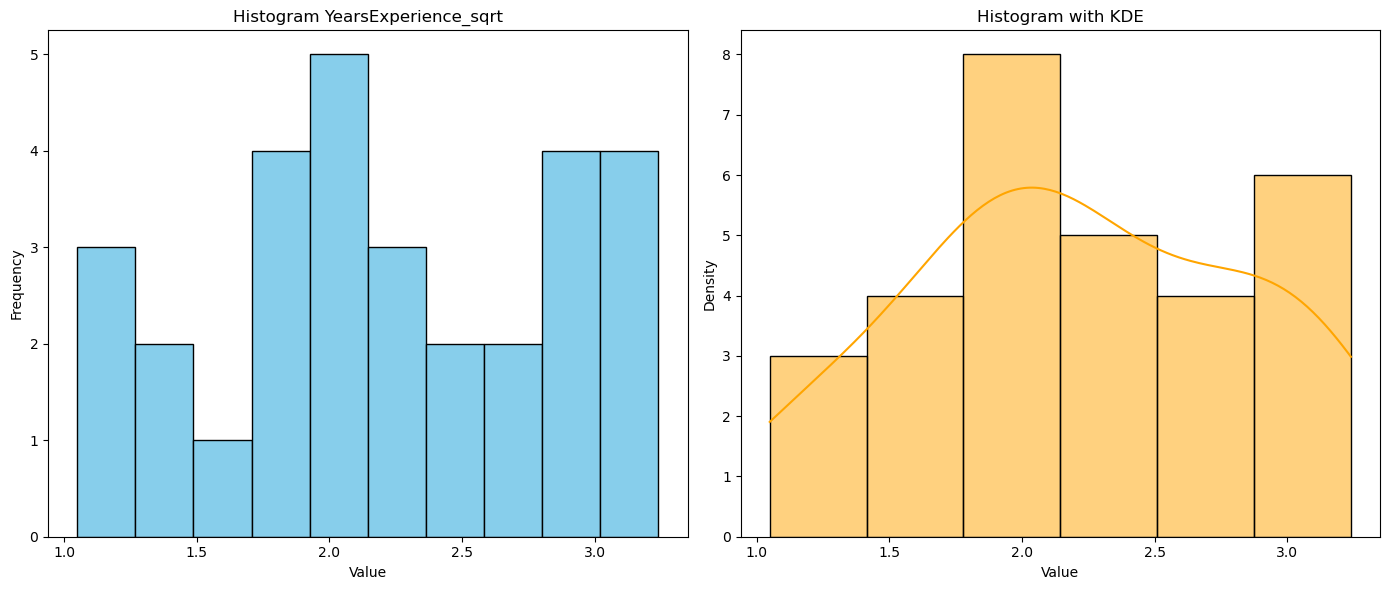

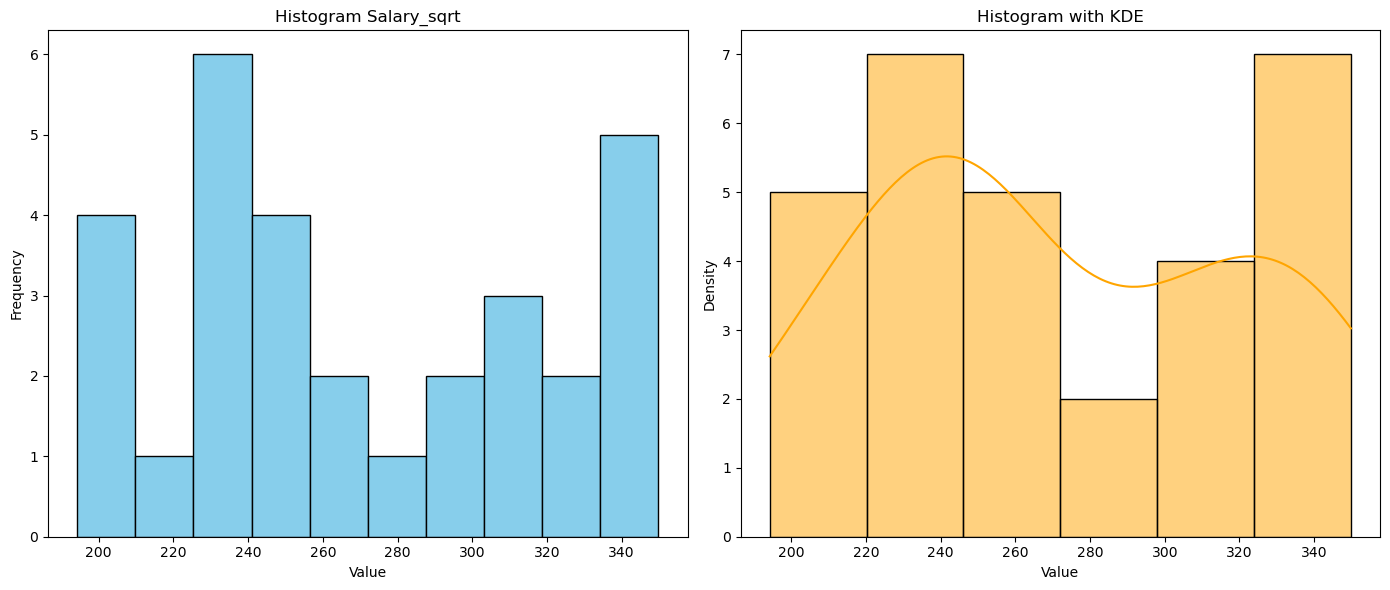

In [17]:
salary_num_df = salary_df[['YearsExperience_sqrt', 'Salary_sqrt']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(salary_num_df)

# 11. Standization - Normalization

In [18]:
salary_df

,YearsExperience,Salary,YearsExperience_log,Salary_log,YearsExperience_sqrt,Salary_sqrt
0,1.1,39343,0.741937,10.580073,1.048809,198.350700
1,1.3,46205,0.832909,10.740843,1.140175,214.953483
2,1.5,37731,0.916291,10.538237,1.224745,194.244691
3,2.0,43525,1.098612,10.681091,1.414214,208.626460
4,2.2,39891,1.163151,10.593906,1.483240,199.727314
5,2.9,56642,1.360977,10.944506,1.702939,237.995798
6,3.0,60150,1.386294,11.004597,1.732051,245.254969
7,3.2,54445,1.435085,10.904946,1.788854,233.334524
8,3.2,64445,1.435085,11.073567,1.788854,253.860198
9,3.7,57189,1.547563,10.954117,1.923538,239.142217


In [19]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected column
scaled_column = scaler.fit_transform(salary_df[['YearsExperience', 'Salary']])

# Replace the original column with the scaled column
salary_df[['YearsExperience_MinMax', 'Salary_MinMax']]= scaled_column
print(salary_df)

    YearsExperience  Salary  YearsExperience_log  Salary_log  \
0               1.1   39343             0.741937   10.580073   
1               1.3   46205             0.832909   10.740843   
2               1.5   37731             0.916291   10.538237   
3               2.0   43525             1.098612   10.681091   
4               2.2   39891             1.163151   10.593906   
5               2.9   56642             1.360977   10.944506   
6               3.0   60150             1.386294   11.004597   
7               3.2   54445             1.435085   10.904946   
8               3.2   64445             1.435085   11.073567   
9               3.7   57189             1.547563   10.954117   
10              3.9   63218             1.589235   11.054344   
11              4.0   55794             1.609438   10.929422   
12              4.0   56957             1.609438   10.950052   
13              4.1   57081             1.629241   10.952227   
14              4.5   61111             

In [20]:
salary_df.describe()

,YearsExperience,Salary,YearsExperience_log,Salary_log,YearsExperience_sqrt,Salary_sqrt,YearsExperience_MinMax,Salary_MinMax
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.313333,76003.000000,1.735552,11.173975,2.218247,271.327262,0.448227,0.452067
std,2.837888,27414.429785,0.486733,0.368787,0.637381,49.666304,0.301903,0.323818
min,1.100000,37731.000000,0.741937,10.538237,1.048809,194.244691,0.000000,0.000000
25%,3.200000,56720.750000,1.435085,10.945892,1.788854,238.161013,0.223404,0.224306
50%,4.700000,65237.000000,1.739850,11.085708,2.167457,255.410642,0.382979,0.324900
75%,7.700000,100544.750000,2.162504,11.518272,2.774166,317.081125,0.702128,0.741953
max,10.500000,122391.000000,2.442347,11.714976,3.240370,349.844251,1.000000,1.000000


# 12. Convert Cat - to - Numerical Columns

# 13. Inferential statistics test

In [21]:
import statsmodels.api as sm
X = sm.add_constant(salary_df[ ['YearsExperience_MinMax']])

# Fit a linear regression model
model = sm.OLS(salary_df['Salary_MinMax'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")


                            OLS Regression Results                            
Dep. Variable:          Salary_MinMax   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        12:18:13   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

$Observations$
- Durbin-Watson (1.648) - Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

# 14. ML - Linear Regression Model

In [22]:
salary_df

,YearsExperience,Salary,YearsExperience_log,Salary_log,YearsExperience_sqrt,Salary_sqrt,YearsExperience_MinMax,Salary_MinMax
0,1.1,39343,0.741937,10.580073,1.048809,198.350700,0.000000,0.019041
1,1.3,46205,0.832909,10.740843,1.140175,214.953483,0.021277,0.100094
2,1.5,37731,0.916291,10.538237,1.224745,194.244691,0.042553,0.000000
3,2.0,43525,1.098612,10.681091,1.414214,208.626460,0.095745,0.068438
4,2.2,39891,1.163151,10.593906,1.483240,199.727314,0.117021,0.025514
5,2.9,56642,1.360977,10.944506,1.702939,237.995798,0.191489,0.223376
6,3.0,60150,1.386294,11.004597,1.732051,245.254969,0.202128,0.264812
7,3.2,54445,1.435085,10.904946,1.788854,233.334524,0.223404,0.197425
8,3.2,64445,1.435085,11.073567,1.788854,253.860198,0.223404,0.315545
9,3.7,57189,1.547563,10.954117,1.923538,239.142217,0.276596,0.229837


In [23]:
salary_df.columns

Index(['YearsExperience', 'Salary', 'YearsExperience_log', 'Salary_log',
       'YearsExperience_sqrt', 'Salary_sqrt', 'YearsExperience_MinMax',
       'Salary_MinMax'],
      dtype='object')

In [24]:
df_final=salary_df[['YearsExperience_MinMax', 'Salary_MinMax']].copy()

In [25]:
X=df_final.drop(['Salary_MinMax'],axis='columns')
Y=df_final['Salary_MinMax']

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 21
test data length: 9


Index(['YearsExperience_MinMax'], dtype='object')

In [27]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [28]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

print("train R2 Score:",lr.score(X_train,Y_train))
print("Test R2 Score:",lr.score(X_test,Y_test))
print("Test R2 score:",r2_score(Y_test,Y_pred))

print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred))
print("Adj-R Score",adjusted_r_squared(Y_test,Y_pred,len(Y_test),1))

columns: Index(['YearsExperience_MinMax'], dtype='object')
Coefficients:  [1.03694033]
Intercept: -0.018185350447792126
train R2 Score: 0.9574526669392872
Test R2 Score: 0.9414466227178214
Test R2 score: 0.9414466227178214
MSE: 0.005271801128195494
RMSE: 0.0726071699503258
Adj-R Score 0.9330818545346531


     YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Yr_Min= 1.1
Yr_Max= 10.5
Salary_Min = 37731
Salary_Max = 122391

In [29]:
import pickle
pickle.dump(lr, open('salary-model.pkl', 'wb'))

# 15. Erros - Normaly distributed

C:\Users\91956\AppData\Local\Temp\ipykernel_16272\81128678.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array(delta_y), bw=0.5)


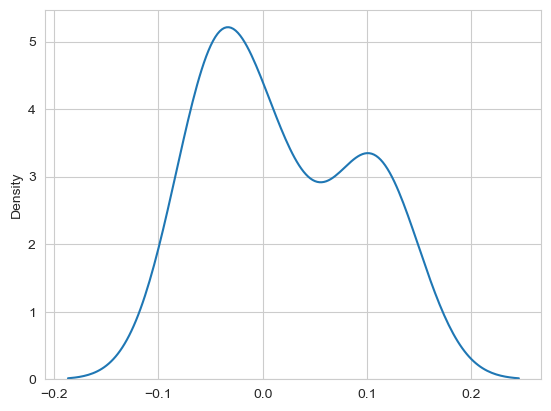

In [30]:
delta_y = Y_test - Y_pred;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

## Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
print("Model - Decision Tree Regression")

# Predict on training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)
# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Decision Tree Regression
train - MSE 0.0
train - RMSE 0.0
train-R 2 Score 1.0
test - MSE 0.009653745864537249
test - RMSE 0.09825347762057712
test-R 2 Score 0.8927767929694256


## Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, Y_train)
print("Model - Random Forest Regression")

# Predict on training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Random Forest Regression
train - MSE 0.0006014601817749338
train - RMSE 0.024524685151392542
train-R 2 Score 0.9936583219100322
test - MSE 0.0061763683694492115
test - RMSE 0.07858987447151962
test-R 2 Score 0.9313996832247988


## Support Vector Regression (SVR)

In [33]:
from sklearn.svm import SVR

# Create and fit the model
model = SVR(kernel='linear')
model.fit(X_train, Y_train)
print("Model - Support Vector Regression ")

# Predict on training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Support Vector Regression 
train - MSE 0.0060449065310873695
train - RMSE 0.07774899697801489
train-R 2 Score 0.9362636921517026
test - MSE 0.008833180906545036
test - RMSE 0.09398500362581808
test-R 2 Score 0.9018907273538016


## AdaBoost Regression

In [34]:
from sklearn.ensemble import AdaBoostRegressor

# Create and fit the model
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, Y_train)
print("Model - AdaBoost Regression ")
# Predict on training set
y_train_pred = ada_boost.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = ada_boost.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - AdaBoost Regression 
train - MSE 0.0005549996187889267
train - RMSE 0.023558429888023664
train-R 2 Score 0.9941481929659456
test - MSE 0.007981913955969132
test - RMSE 0.08934155783267456
test-R 2 Score 0.9113456657539499


## Gradient Boosting Regression

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the model
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, Y_train)
print("Model - Gradient Boosting Regression")

# Predict on training set
y_train_pred = gradient_boost.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = gradient_boost.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Gradient Boosting Regression
train - MSE 3.5030955902093584e-06
train - RMSE 0.0018716558418174422
train-R 2 Score 0.9999630640477547
test - MSE 0.009500999386789425
test - RMSE 0.09747307005932164
test-R 2 Score 0.894473333093494


## XGBoost Regression

In [36]:
import xgboost as xgb

# Create and fit the model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, Y_train)
print("Model-XGBoost Regression")

# Predict on training set
y_train_pred = xg_boost.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = xg_boost.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model-XGBoost Regression
train - MSE 1.6157938432503184e-06
train - RMSE 0.0012711387977913026
train-R 2 Score 0.9999829633868972
test - MSE 0.010978931518369596
test - RMSE 0.10478039663204944
test-R 2 Score 0.8780580860852121


# Conclusion

1. Linear Regression on the Salary Dataset is completed.
2. The regression equation obtained is:
    ```python
    Salary = -0.018185350447792126 + 1.03694033 * YearsExperience_MinMax
    ```
3. Test Score Metrics:
    - Test R2 score: 0.9414466227178214
    - Mean Squared Error (MSE): 0.005271801128195494
    - Root Mean Squared Error (RMSE): 0.0726071699503258
    - Adjusted R-squared Score: 0.9330818545346531
